<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/UTS/Regression%20Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1qwUQGbXIW_XJpczmSzfvVJUe2LAQaDx5

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1qwUQGbXIW_XJpczmSzfvVJUe2LAQaDx5
From (redirected): https://drive.google.com/uc?id=1qwUQGbXIW_XJpczmSzfvVJUe2LAQaDx5&confirm=t&uuid=40a2991e-4135-4a85-b9ba-8e2fa94991e9
To: /content/RegresiUTSTelkom.csv
100% 443M/443M [00:06<00:00, 71.2MB/s]


In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

In [2]:
import pandas as pd

# Load data
df = pd.read_csv('/content/RegresiUTSTelkom.csv')

# Cek data awal
print(df.head())

# Cek missing value
print(df.isnull().sum())

# Jika ada missing value, isi dengan median
df = df.fillna(df.median())

# Cek tipe data
print(df.dtypes)


   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

In [3]:
# Load data
df = pd.read_csv('/content/RegresiUTSTelkom.csv')

# Hapus missing value (kalau ada)
df = df.fillna(df.median())

# Hapus data duplikat dengan cara lebih efisien
df.drop_duplicates(inplace=True)

# Pisahkan fitur dan target
target_column = df.columns[-1]  # Ganti sesuai nama kolom target di dataset kamu
X = df.drop(columns=[target_column])
y = df[target_column]

# Hitung Mutual Information
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("Top fitur berdasarkan Mutual Information Regression:")
print(mi_scores)

# Pilih Top 10 Fitur
top_features = mi_scores.head(10).index.tolist()

# Ambil fitur terpilih
X_selected = X[top_features]


Top fitur berdasarkan Mutual Information Regression:
10.20556     0.140863
68.40795     0.132764
-27.46348    0.109744
13.0162      0.094614
179.19498    0.089067
               ...   
70.95626     0.004580
2001         0.004395
-2.46783     0.003570
3.32136      0.003535
-24.21531    0.003020
Length: 90, dtype: float64


In [4]:
# Deteksi apakah ada fitur kategorikal
categorical_cols = X_selected.select_dtypes(include='object').columns.tolist()

# Kalau ada, lakukan One-Hot Encoding
if categorical_cols:
    X_selected = pd.get_dummies(X_selected, columns=categorical_cols)

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


In [8]:
from sklearn.pipeline import Pipeline
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (deg=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ]),
    'Decision Tree': DecisionTreeRegressor(max_depth=3),  # batasi kedalaman tree
    'KNN Regressor': KNeighborsRegressor(n_neighbors=2),
    'Bagging Regressor': BaggingRegressor(n_estimators=10, n_jobs=-1),  # kurangin estimators
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=30),
    'SVR (Sampled)': SVR()
}

# Jika mau lebih cepat lagi, sampling dataset untuk model berat
from sklearn.model_selection import train_test_split
X_small, _, y_small, _ = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# Model Evaluation
for name, model in models.items():
    if "SVR" in name:
        # Untuk SVR, hanya ambil subset kecil supaya cepat
        scores = cross_val_score(model, X_small, y_small, scoring='r2', cv=3, n_jobs=-1)
    else:
        scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=5, n_jobs=-1)
    print(f"{name}: Mean R2 Score = {np.mean(scores):.4f}")

Linear Regression: Mean R2 Score = 0.1519
Polynomial Regression (deg=2): Mean R2 Score = 0.3981
Decision Tree: Mean R2 Score = 0.2162
KNN Regressor: Mean R2 Score = 0.3440
Bagging Regressor: Mean R2 Score = 0.5082


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


AdaBoost Regressor: Mean R2 Score = 0.1348
SVR (Sampled): Mean R2 Score = 0.3652


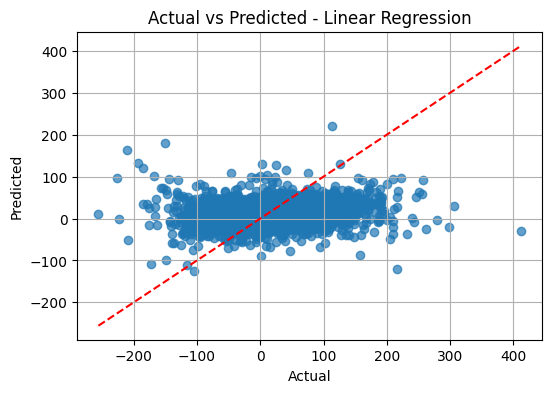

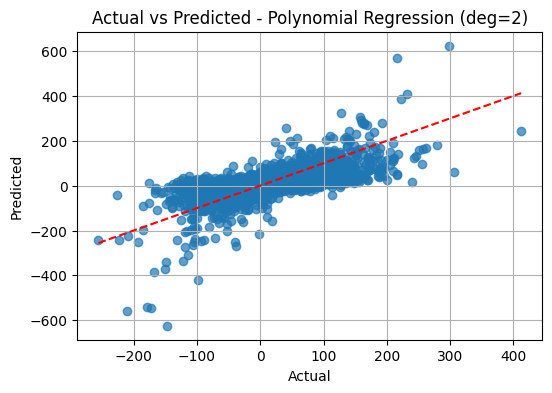

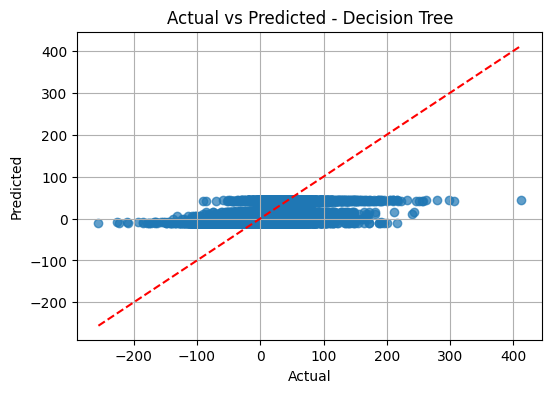

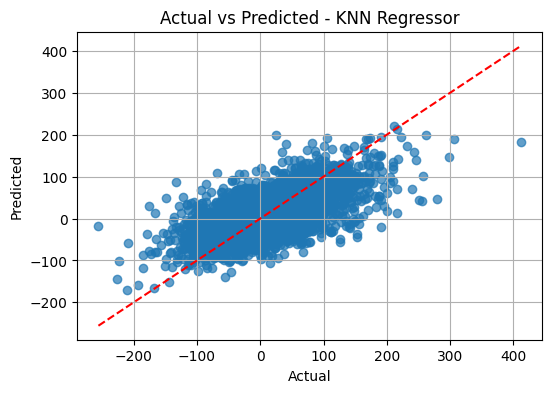

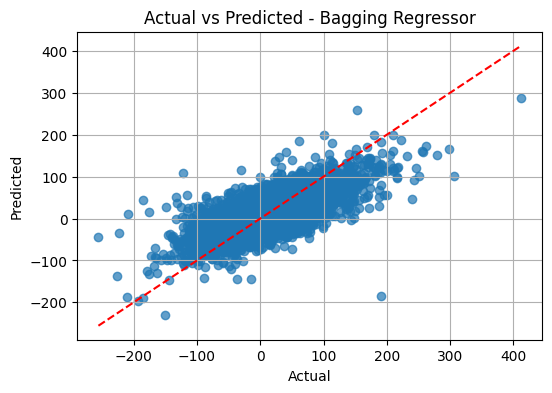

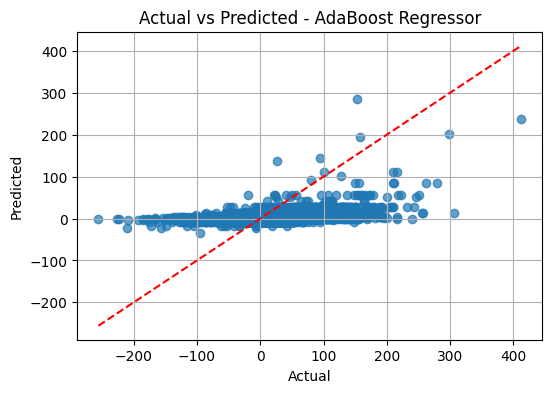

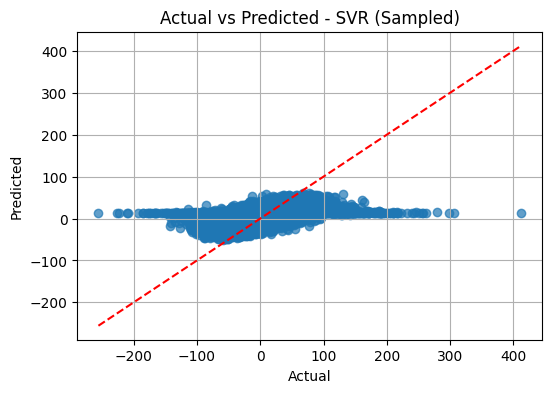

                           Model         MSE       RMSE        R2
4              Bagging Regressor  232.463176  15.246743  0.519156
1  Polynomial Regression (deg=2)  288.471258  16.984442  0.403305
3                  KNN Regressor  305.704599  17.484410  0.367658
6                  SVR (Sampled)  311.179426  17.640279  0.364306
2                  Decision Tree  373.785335  19.333529  0.226835
0              Linear Regression  409.712039  20.241345  0.152521
5             AdaBoost Regressor  433.072392  20.810391  0.104201


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fungsi Evaluasi Model
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    if "SVR" in name:
        # Untuk SVR, gunakan subset kecil untuk percepat
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)
        X_test_sub, _, y_test_sub, _ = train_test_split(X_test, y_test, test_size=0.8, random_state=42)

        model.fit(X_train_sub, y_train_sub)
        y_pred = model.predict(X_test_sub)
        mse = mean_squared_error(y_test_sub, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_sub, y_pred)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

    # Visualisasi Prediksi vs Aktual
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, model.predict(X_test), alpha=0.7)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.grid(True)
    plt.show()

    return {
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Split data before evaluating models # Moved this line here
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Evaluasi semua model
results = []
for name, model in models.items():
    res = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(res)

# Buat DataFrame hasil evaluasi
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2', ascending=False))

# Penjelasan  Setiap Model yang ada

| Model | Penjelasan |
|:--|:--|
| **Linear Regression** | Model dasar yang mencari garis lurus terbaik untuk meminimalkan selisih antara prediksi dan nilai aktual. |
| **Polynomial Regression** | Perluasan Linear Regression yang menambahkan fitur berbasis polinomial (seperti \( x^2, x^3 \)) untuk menangkap hubungan non-linear. |
| **Decision Tree Regressor** | Memisahkan data menjadi beberapa region menggunakan aturan if-then-else untuk melakukan prediksi. Sangat efektif untuk hubungan non-linear. |
| **KNeighbors Regressor** | Membuat prediksi dengan menghitung rata-rata nilai target dari tetangga terdekat di ruang fitur. Sensitif terhadap skala data. |
| **Bagging Regressor** | Ensemble dari banyak regressor sederhana (contohnya pohon keputusan kecil) dengan teknik bootstrap aggregation untuk mengurangi variansi. |
| **AdaBoost Regressor** | Metode boosting yang menekankan pembelajaran pada data yang sulit diprediksi di iterasi berikutnya, efektif meningkatkan performa model sederhana. |
| **Gradient Boosting Regressor** | Model boosting lanjutan yang memperbaiki kesalahan prediksi secara bertahap dengan menambahkan model baru. Biasanya sangat efektif. |
| **SVR (Support Vector Regressor)** | Menerapkan konsep margin optimal seperti SVM, tetapi untuk regresi. Dapat mengatasi hubungan non-linear dengan kernel trick. |

---

# Analisis Model Terbaik

Berdasarkan:
- **Nilai RMSE terkecil**
- **Nilai R² terbesar**
- **Kestabilan prediksi (dari visualisasi Predicted vs Actual)**

**Bagging Regressor** sebagai model terbaik:
- **MSE terkecil** (232.46) → error kuadrat paling kecil.
- **RMSE terkecil** (15.25) → rata-rata error prediksi paling kecil.
- **R² terbesar** (0.519) → model mampu menjelaskan 51.9% variasi data.

---

# 1. Strategi Mengatasi Underfitting (Linear Regression / Decision Tree)

### Dua Pendekatan:

**a. Transformasi Fitur (Polynomial Features / Feature Engineering)**

- Untuk Linear Regression, jika hubungan fitur dan target tidak linear, bisa ditambahkan fitur baru seperti $$( x^2 ), ( \sqrt{x} ), atau ( \log(x) ).$$
- **Dampak:** Bias menurun, variansi naik → model menjadi lebih fleksibel.

**b. Gunakan Model Lebih Kompleks (Ensemble/Boosting)**

- Untuk Decision Tree, dibandingkan hanya satu pohon, gunakan Random Forest atau Gradient Boosting.
- **Dampak:** Bias turun drastis, variansi tetap terkontrol berkat teknik averaging atau boosting yang fokus memperbaiki error.

| Aspek | Transformasi Fitur | Model Kompleks (Ensemble) |
|:--|:--|:--|
| **Bias** | Turun | Turun lebih banyak |
| **Variance** | Naik | Stabil atau sedikit naik |
| **Komputasi** | Rendah - Sedang | Tinggi |
| **Kelebihan** | Simpel | Akurasi tinggi |
| **Kekurangan** | Tidak bisa menangani semua kompleksitas | Biaya komputasi mahal |

---

# 2. Alternatif Loss Function untuk Regresi

| Loss Function | Kelebihan | Kelemahan | Cocok untuk |
|:--|:--|:--|:--|
| **MAE (Mean Absolute Error)** | Tahan terhadap outlier, interpretasi mudah | Tidak halus, gradien kurang stabil | Data dengan banyak outlier |
| **Huber Loss** | Kombinasi MAE dan MSE: tetap halus, tahan outlier | Perlu tuning parameter delta | Data dengan noise moderat dan sedikit outlier |

### Ringkasan:
- **MAE** cocok untuk data dengan banyak outlier (menggunakan error absolut, bukan kuadrat).
- **Huber Loss** cocok untuk training yang lebih stabil, tetap toleran terhadap beberapa outlier.

---

# 3. Metode Menilai Pentingnya Fitur Tanpa Mengetahui Namanya

**a. Koefisien Regresi (Model Linear)**

- Nilai absolut koefisien menunjukkan seberapa besar pengaruh fitur terhadap target.
- Hanya valid jika hubungan antara fitur dan target linear.

**b. Feature Importance (Model Pohon)**

- Decision Tree atau Random Forest mengukur pentingnya fitur berdasarkan pengurangan impurity saat fitur digunakan untuk split.

| Metode | Keterbatasan |
|:--|:--|
| Koefisien Regresi | Hanya cocok untuk hubungan linear, sensitif terhadap skala fitur |
| Feature Importance | Bias terhadap fitur dengan banyak kategori atau level |

---

# 4. Desain Eksperimen Hyperparameter Tuning

### Langkah:

1. **Tentukan parameter penting** (contoh: `max_depth` untuk Decision Tree, `learning_rate` untuk Boosting).
2. **Pilih metode pencarian**:
   - **GridSearchCV**: uji semua kombinasi, lebih lengkap tapi lambat.
   - **RandomizedSearchCV**: sampling sebagian kombinasi, lebih cepat.
3. **Gunakan K-Fold Cross Validation** (contoh: K=5).

| Aspek | GridSearchCV | RandomizedSearchCV |
|:--|:--|:--|
| **Komputasi** | Tinggi | Lebih rendah |
| **Stabilitas** | Stabil | Bergantung pada sampling |
| **Generalisasi** | Baik | Baik, asal ruang pencarian parameter realistis |

---

# 5. Jika Residual Plot Menunjukkan Pola Non-Linear dan Heteroskedastisitas

### Langkah:

1. **Transformasi Fitur**:
   - Transformasi target (Y) atau fitur (X) menggunakan log, akar kuadrat, atau Box-Cox.
   - Tujuannya membuat hubungan lebih linear.

2. **Gunakan Model Non-Linear**:
   - Coba Polynomial Regression, Decision Tree, atau Gradient Boosting.


- Residual pola non-linear menunjukkan Linear Regression tidak cukup → perlu model yang bisa menangkap non-linearitas.
- Heteroskedastisitas berarti varian error tidak konstan → perlu transformasi atau model yang lebih robust.

